<h1>AIML CA1 Classification</h1>

<h5>Name : Rejey Ezekiel Jeyakumar
</br>Class : DAAA/FT/1B/01
</br>Admin No. : 2348935</h5>

<hr>

<h5><b>The objectives of this assignment are to:</b></h5>
<ol>
<li>Explore the given dataset,<i> credit_dataset.csv</i>, and try to gain insights from it.</li>
<li>Build a classification model to predict whether a customer will default payment in the next month, in order to better manage risk for a bank.</li>
</ol>

<h5><b>Background Info:</b></h5>
A bank has collected data on it's customers, such as their age, gender, level of education, credit limit, payment and bill history. From this data, the bank would like to predict if a customer would default on their bill in the upcoming month, in a attempt to mitigate risk taken. If a customer is predicted to default on their bill, the bank can take action to mitigate the risk, such as reducing the credit limit of the customer, or contacting the customer to remind them to pay their bill.

<h5><b>Additional Info:</b></h5>
A default is a missed or multiple missed payments on money that you have borrowed. An example of a default would be not paying your credit card bill or your monthly mortgage payment. (Investopedia, 2023)

Potential Reasons for Defaulting:
<ol>
<li>Customer does not have high income, does not have money to repay</li>
</ol>

</br>
<hr>
<h3>Importing Libraries</h3>
<hr></hr>

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SKLEARN Libraries
# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, RobustScaler
from sklearn.impute import KNNImputer

# Model Selection
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    GridSearchCV,
    learning_curve,
    StratifiedKFold,
)
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, accuracy_score, f1_score

# Models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier

# IMBLEARN
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Pickle
import pickle

In [2]:
#Standard seed value
Random_State= 42

<h3>1. Loading Dataset</h3>

In [3]:
#Loading Dataset
df = pd.read_csv('CA1-Classification-Dataset.csv')

#View Dataset
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,Quality
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<hr></hr>
<h3>Exploratory Data Analysis</h3>
<hr></hr>

<li><b>ph:</b> Water pH is crucial for assessing its acid-base balance, indicating its acidic or alkaline status. The WHO recommends a pH range of 6.5 to 8.5; the current investigation found pH levels of 6.52–6.83, aligning with WHO standards.</li>
<li><b>Hardness:</b> The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.</li>
<li><b>Solids:</b> Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts.</li>
<li><b>Chloramines Status:</b> This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.</li>
<li><b>Sulfate:</b> Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food.</li>
<li><b>Conductivity:</b> Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. </li>
<li><b>Organic_carbon:</b> TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.</li>
<li><b>Trihalomethanes:</b> THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water.</li>
<li><b>Clarity:</b> It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter.</li>
<li><b>Quality:</b>Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.</li>

1. Seeing the outline of the dataset.
<hr></hr>

In [4]:
#View the size of the dataset and the columns.
print(f'Shape of the Column: {df.shape}')

Shape of the Column: (3276, 10)


In [5]:
#View the features of the dataset
print(f'Columns of Dataset: {df.columns}')

Columns of Dataset: Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Clarity', 'Quality'],
      dtype='object')


In [6]:
# Getting info of the dataset
print('The Information about the Dataset')
df.info()

The Information about the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Clarity          3276 non-null   float64
 9   Quality          3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
#Viewing the count, mean , standard deviation and many more key information.
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,Quality
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Target Label
Our target label is the Quality column. It is a binary column with two values:

Qulaity Values: [0 1]


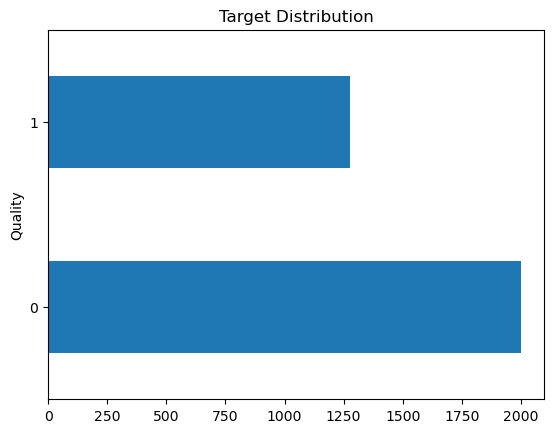

In [8]:
print(f'Qulaity Values: {df["Quality"].unique()}')

ax = (
    df["Quality"]
    .value_counts()
    .plot(kind="barh", title="Target Distribution")
)

<b>Analysis after viewing the outline of the dataset</b>
<li>The shape of the dataset is (3276, 10) showing that there are 3276 data points, and 10 Columns.In the 10 Columns there are 9 Features and 1 Target Variable being Quality.</li>
<li>From the Count we can also see that there are some missing values within PH, Sulfate and Trihalomethanes.</li>
<li>We can also see that every data in the dataset is numeric and not categorical.</li>

2. Seeing the Missing Values in the dataset.
<hr></hr>

Checking for missing values in dataset.

In [9]:
#from this we can see the total number of missing data
print(f'Missing Values in dataset (Amount):\n{pd.isnull(df).sum()}\n')
print(f"Total Missing Values: {(pd.isnull(df).sum()).sum()}")

Missing Values in dataset (Amount):
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Clarity              0
Quality              0
dtype: int64

Total Missing Values: 1434


Visualising the missing values in the dataset.

<Axes: >

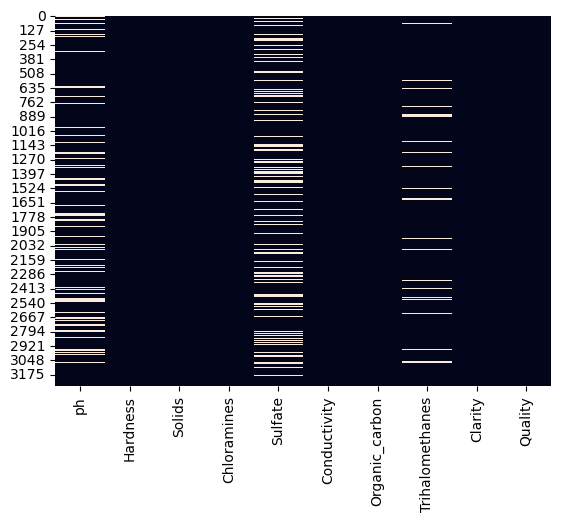

In [10]:
#From this we can see that the 3 columns with alot of missing data are sulfate, ph and trihalomethanes
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

<b>Analysis after viewing the Missing Values in the Dataset</b>
<li>From the above information we can se that 3 features make up the total missing values in out dataset being sulfate, ph and trihalomethanes.</li>
<li>The total amount of missing values add up to 1434.</li>
<br>

<h4>Univariate Analysis</h4>

We will begin with a univariate analysis, analysing the distribution of each variable.

<h5>Distribution of numerical features</h5>

We will plot and see the distribution of the different numerical variables and how it relates to Qulaity. To do this, we have a function to plot a distribution plot.
<hr></hr>

<li>The Red line is when the Quality is 1.</li>
<li>The Blue line is when the Quality is 0.</li>
<li>The green lined graph represents the normal distrubution for that feature.</li>
<li>The black dotted line is the mean of the feature.</li>
<li>Purple Bar chart is where the Quality is mixed with both 0 and 1.</li>

<hr></hr>

<h5>Solids</h5> 
have are right skewed, unbaised skew of 0.62 there are more values below the mean.

This distribution also shows that its not a normal distribution. (Have to normalize)

From this graph we can also see that there are outliers in the distribution.

This distribution also show no real correlations between solids and quality.

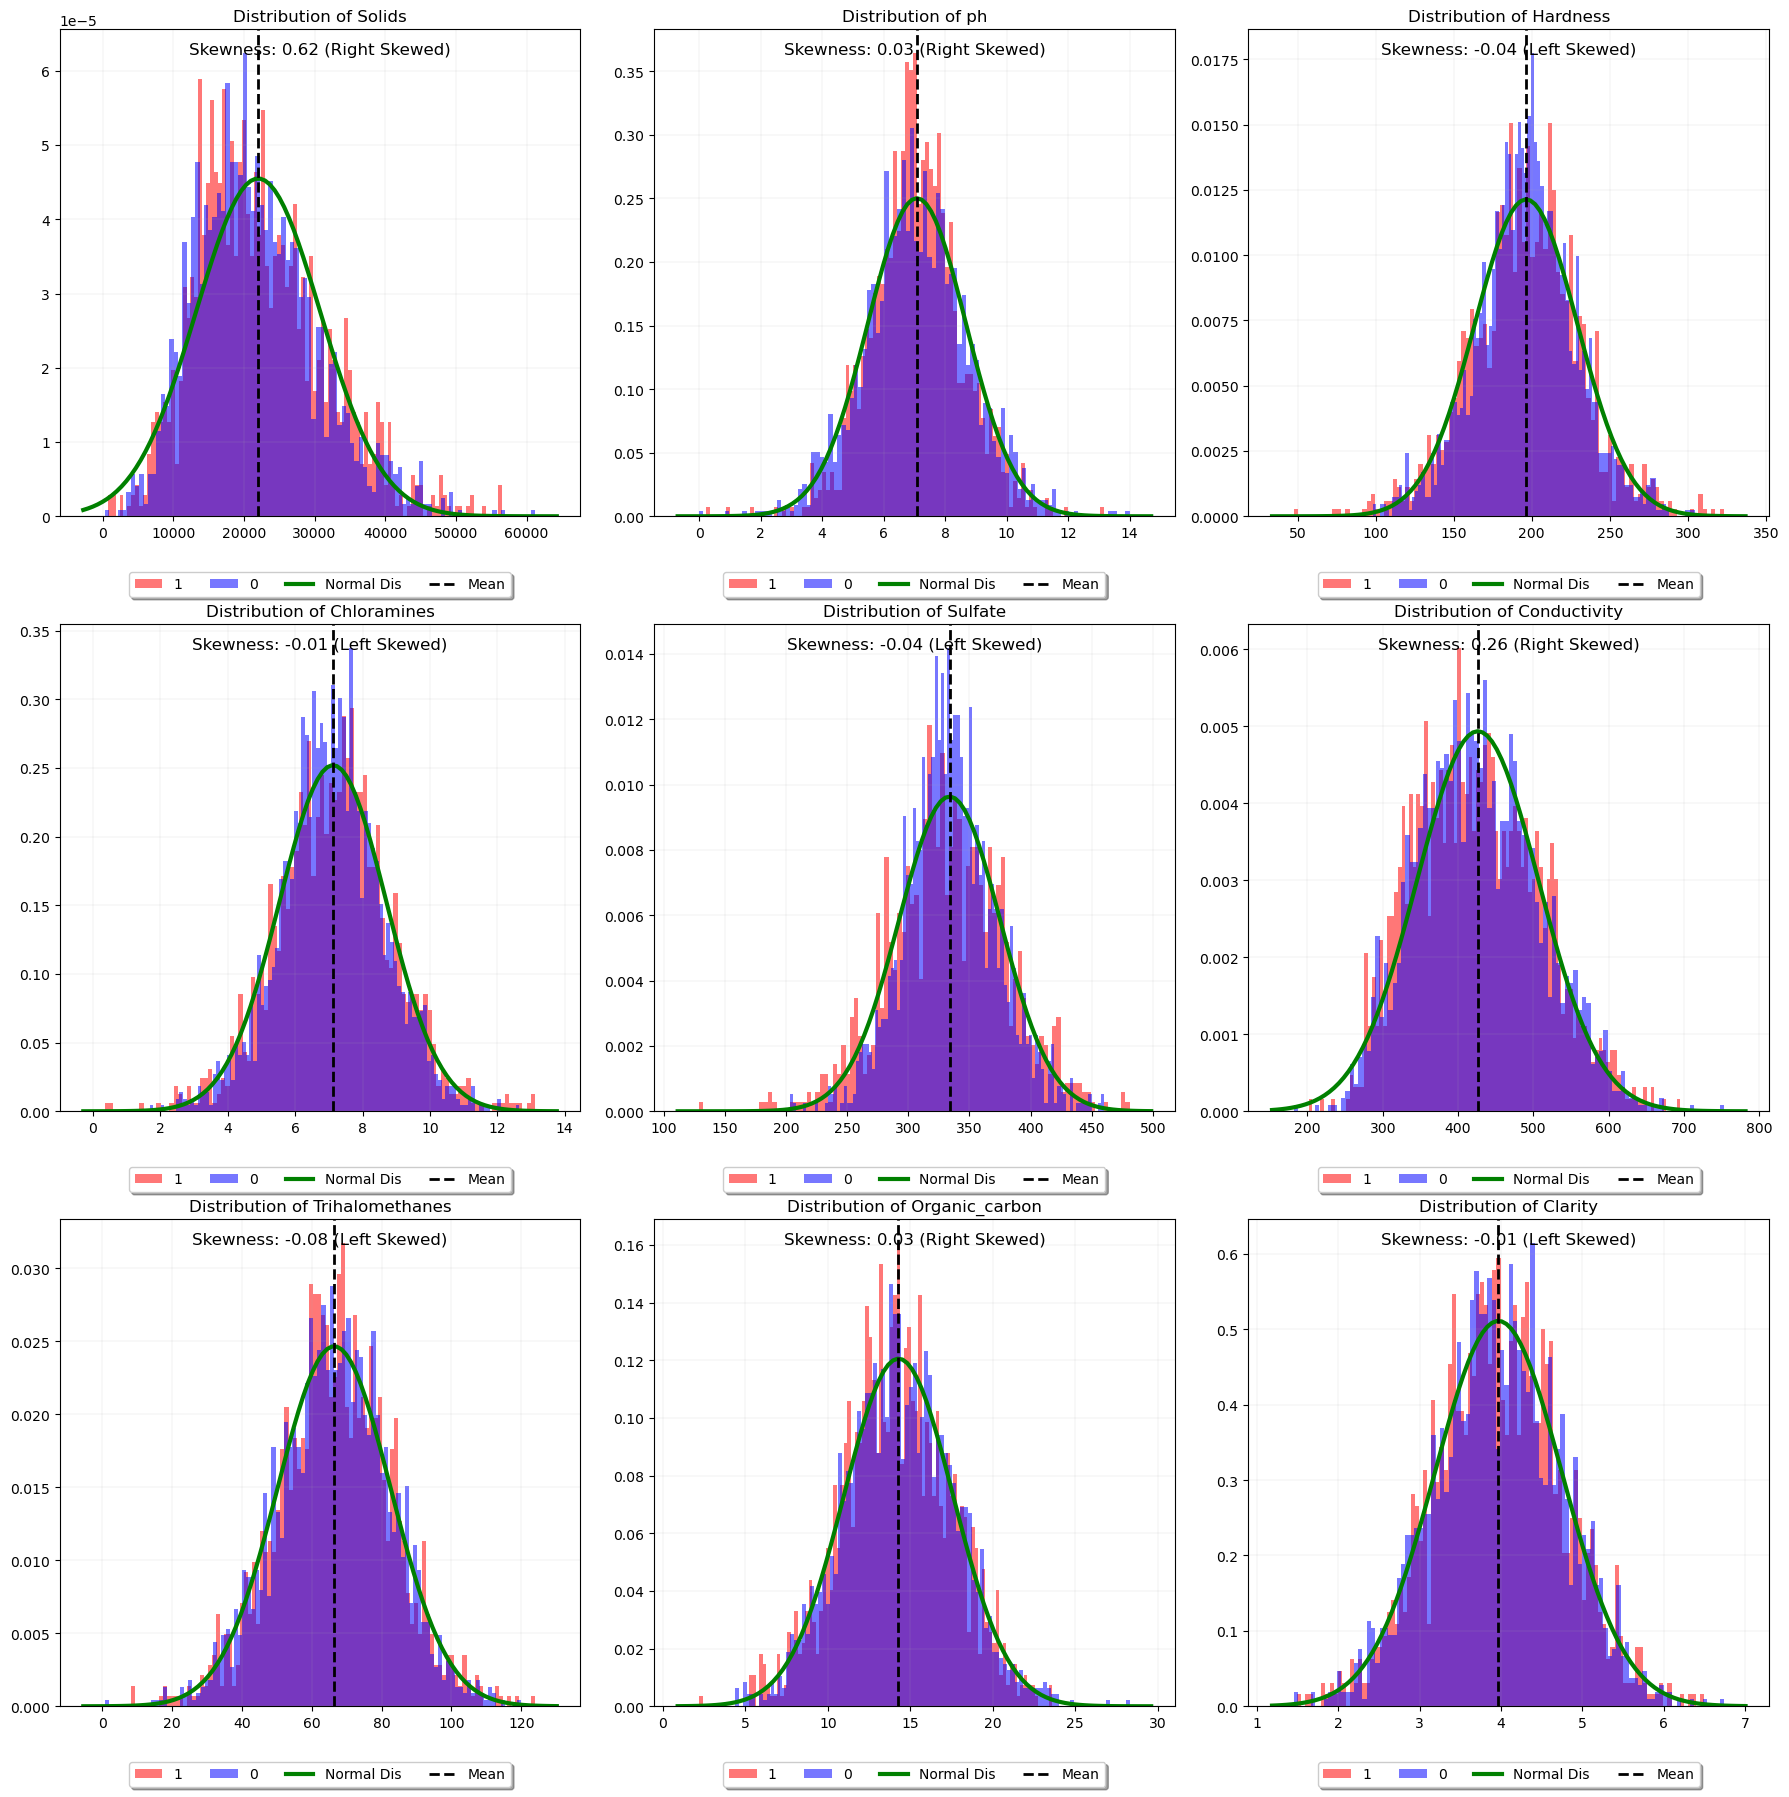

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Function to plot the distribution of a numerical feature
def plot_distribution(ax, df, col):
    # Plots
    ax.hist(
        df[col][df["Quality"] == 1],
        density=True,
        bins=100,
        color="#ff000088",
        label="1",
    )
    ax.hist(
        df[df["Quality"] == 0][col],
        density=True,
        bins=100,
        color="#0000ff88",
        label="0",
    )

    # Plot a normal distribution
    mu, std = df[col].mean(), df[col].std()
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'g', linewidth=3, label="Normal Dis")

    # Add a center line for the mean
    mean_line_color = 'black'
    ax.axvline(df[col].mean(), color=mean_line_color, linestyle='dashed', linewidth=2, label="Mean")

    # Display skewness and direction
    skewness = df[col].skew()
    skewness_direction = "Right" if skewness > 0 else "Left"
    ax.annotate(f'Skewness: {skewness:.2f} ({skewness_direction} Skewed)', xy=(0.5, 0.95), xycoords='axes fraction', ha='center', fontsize=12)

    # Legend
    ax.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, -0.1),
        fancybox=True,
        shadow=True,
        ncol=4,
    )

    # Title
    ax.set_title("Distribution of " + col)
    
    # Add a light gray grid
    ax.grid(True, linestyle='-', linewidth=0.25, alpha=0.5)

# Create a 3x3 subplot
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Flatten the axs array for easy indexing
axs = axs.flatten()

# Plot each distribution in a subplot
features = ["Solids", "ph", "Hardness", "Chloramines", "Sulfate", "Conductivity", "Trihalomethanes", "Organic_carbon", "Clarity"]

for i in range(9):
    plot_distribution(axs[i], df, features[i])

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()


<h5>ph</h5> 
have are right skewed, unbaised skew of 0.03 there are more values below the mean than above it.

But for this graph the distribution is almost normal.

There are still some outliers for PH.

There is also almost no correlation between Quality and PH.

<h5>Hardness</h5> 
have are Left skewed, unbaised skew of -0.04 there are more values above the mean than above it.

The Distribution here is also almost normal but still with a little skew.

Again we can see that theres no correlation between Qulaity and Hardness.

<h5>Chloramines</h5> 
have are Left skewed, unbaised skew of -0.01 there are more values above the mean.       

The Distribution here is also almost normal but still with a little skew.

Again we can see that theres no correlation between Qulaity and Chloramines.

<h5>Sulfate</h5> 
have are Left skewed, unbaised skew of -0.04 there are more values above the mean.   

The Graph has some outlier within the dataset.

There is also no correlation between Quality and Sulfate.

<h5>Conductivity</h5> 
have are Right skewed, unbaised skew of 0.26 there are more values below the mean.   

The graph has outliers with no correlation between Quality and Conductivity.

<h5>Organic_carbon</h5> 
have are Right skewed, unbaised skew of 0.03 there are more values below the mean.   

<h5>Trihalomethanes</h5> 
have are Right skewed, unbaised skew of -0.08 there are more values above the mean.   

<h5>Clarity</h5> 
have are Right skewed, unbaised skew of -0.01 there are more values above the mean.   

<h5>Box plot Outliers.</h5>

We can see that are quite a bit of outliers in each feature.

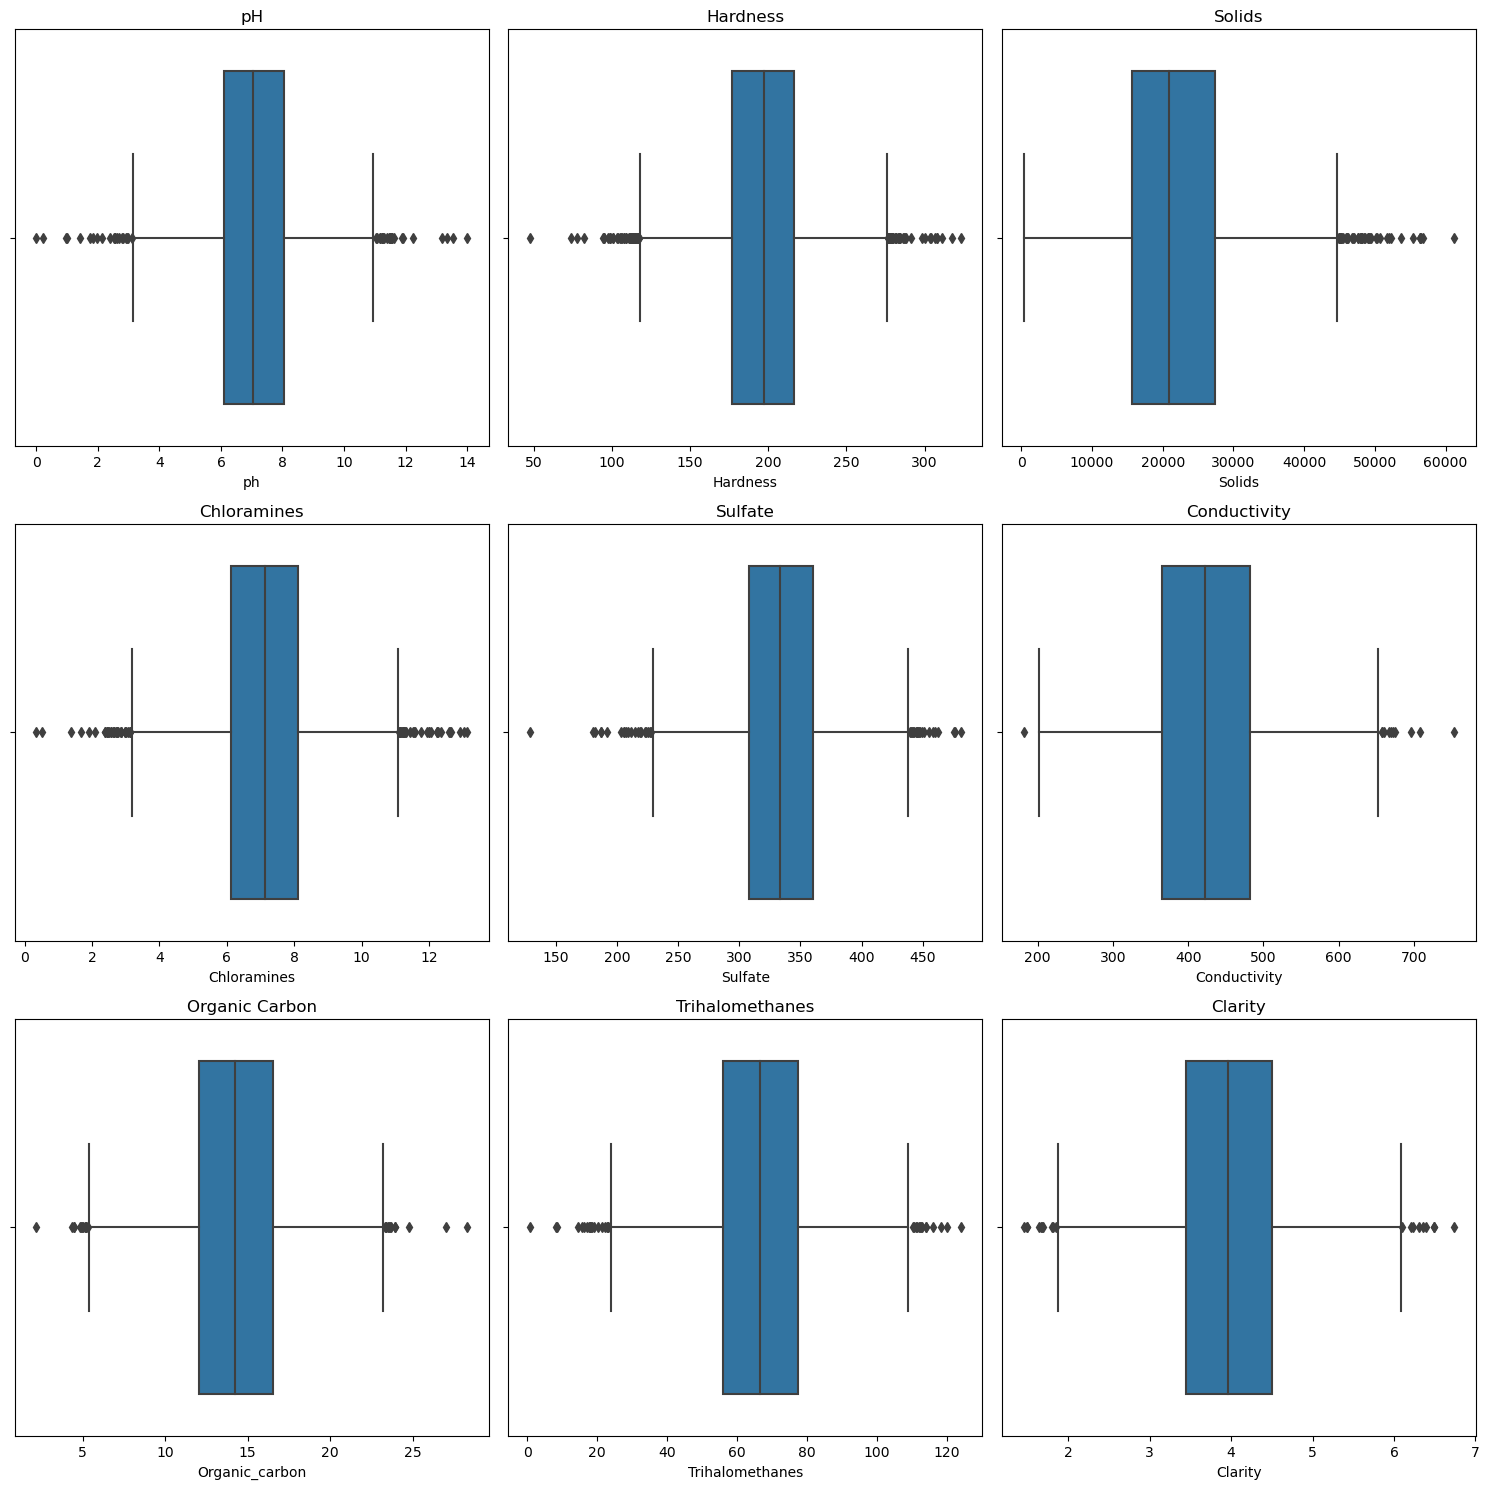

In [12]:
# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the 3x3 array of subplots into a 1D array
axes = axes.flatten()

# Plot each boxplot on a separate subplot with a different y-axis
sns.boxplot(x=df['ph'], ax=axes[0]).set(title='pH')
sns.boxplot(x=df['Hardness'], ax=axes[1]).set(title='Hardness')
sns.boxplot(x=df['Solids'], ax=axes[2]).set(title='Solids')
sns.boxplot(x=df['Chloramines'], ax=axes[3]).set(title='Chloramines')
sns.boxplot(x=df['Sulfate'], ax=axes[4]).set(title='Sulfate')
sns.boxplot(x=df['Conductivity'], ax=axes[5]).set(title='Conductivity')
sns.boxplot(x=df['Organic_carbon'], ax=axes[6]).set(title='Organic Carbon')
sns.boxplot(x=df['Trihalomethanes'], ax=axes[7]).set(title='Trihalomethanes')
sns.boxplot(x=df['Clarity'], ax=axes[8]).set(title='Clarity')

# Remove any empty subplots
for i in range(9, 9):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<h5>Bivariate Analysis</h5>

We will now analyse the relationships between the different variables.

<h5>Pearson's r Correlations</h5>

A correlation coefficient that measures linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations.

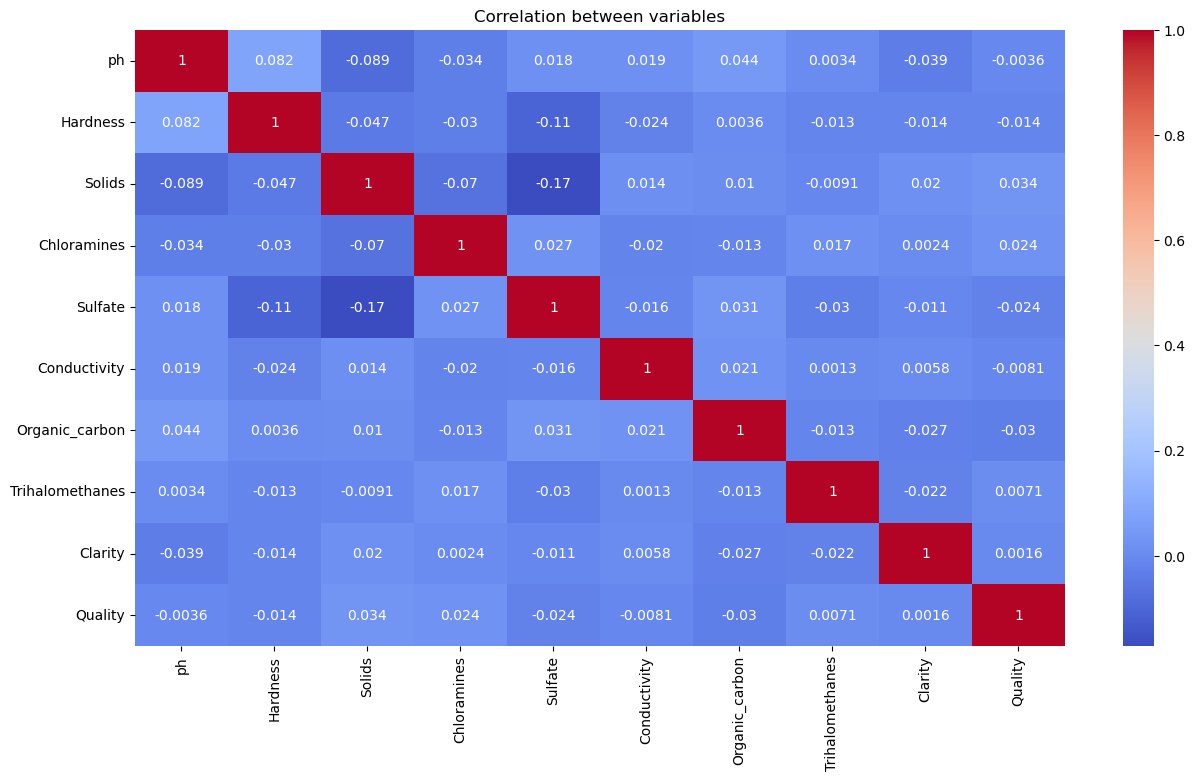

In [13]:
# Figure size
plt.figure(figsize=(15, 8))

# Plot
sns.heatmap(df.corr(), annot=True, cmap='coolwarm').set(title="Correlation between variables")

# Show Plot
plt.show()

<h5>Pairplot</h5>

As there arent many features, we can make use of a Pairplot to visualise the distribution of data points with relation to our target.

In [14]:
# sns.pairplot(df, hue="Quality", palette=["red", "blue" ])
# plt.show()

<b>Observations</b>

There is almost no correlation between any feature nor the target.

<hr></hr>
<h3>Data Preperation</h3>
<hr></hr>

<h5>Dealing with missing Values</h5>
Since Many machine learning algorithms do not support data with missing values, which the dataset has there are 2 Main ways to resolve this issue.
<li>Remove Missing Values<ul><li>Since There is alot of missing values removing them may cause the models to perform worse.</li></ul></li>
<li>Impute Missing Values</li>

The Knn fit imputer is applied to a dataset to create a copy of the dataset with all missing values for each column replaced with an estimated value.

In [15]:

from sklearn.impute import KNNImputer

# Initialize KNNImputer with the desired number of neighbors
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the dataset
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.head(10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,Quality
0,7.156857,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.05786,6.635246,336.094350,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.54173,9.275884,330.449166,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0.0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0.0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0.0
8,7.592418,118.988579,14285.58385,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0.0
9,11.180284,227.231469,25484.50849,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0.0


<li>To prepare our data for machine learning training, we must first divide it into target and feature columns.</li>

<li>Before training a machine learning model, we must first separate our data into target and feature variables.</li>

<li>Data preparation for machine learning involves separating the target variable (y) from the feature variables (X).</li>

In [16]:
X, y = df.drop("Quality", axis=1), df["Quality"]

<h4>Train Test Split</h4>

To assess the performance of our final models, we will reserve a separate test set that has not been used for training. When creating this test set, we will employ stratification to maintain the same class distribution as the training set.

Additionally, we will create a copy of the training data to facilitate visualization of data preprocessing and feature engineering without altering the original training dataset.

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [18]:
# Copy of training data 
X_training = X_train.copy()

<hr> <h3>Feature Engineering</h3>
<hr>

To Make the model perform better i have created a new feature called drinkable where WHO has given guidline for drinkable water and not drinkable water.

Ref: https://www.who.int/teams/environment-climate-change-and-health/water-sanitation-and-health/water-safety-and-quality/drinking-water-quality-guidelines

In [19]:
# Drinkable Feature Engineered
X_training['drinkable'] = (X_training['ph'] >= 6.5) & (X_training['ph'] <= 8.5)

# view new features
X_training.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,drinkable
2214,7.822492,208.636720,22308.82173,5.850328,408.123254,502.789396,16.135732,60.393982,3.835332,True
1634,6.037428,227.033994,12988.79123,8.476905,392.380529,306.386283,7.122391,41.190507,3.594217,False
2605,8.445219,228.522860,28966.56933,6.179855,322.987720,361.705354,14.554220,60.612230,4.400706,True
114,6.745307,218.424637,21871.83870,7.165509,318.046562,373.050102,16.826619,74.086080,3.902353,True
129,6.506488,202.285938,17087.07690,6.201983,326.662368,481.771934,16.535186,46.205748,3.548776,True


<h3>Standardization</h3>
<li>I am using Robust Scaler for standardization as it less susceptible to skewness and outliers.</li>
<li>Secondly Since our dataset consist of maminly numeric features it is easier to use Robust Scaler</li>
<li>robust scaling uses median and IQR makes it resistant to outliers.</li>

Ref: https://proclusacademy.com/blog/robust-scaler-outliers/#:~:text=Standard%20scaling%20uses%20mean%20and,interquartile%20range%20(IQR)%20instead.&text=The%20scaled%20values%20will%20have,makes%20it%20resistant%20to%20outliers.

In [20]:
# Robust Scaler
scaler = RobustScaler()

# Declare numeric columns
num_cols = [
    "ph",
    "Hardness",
    "Solids",
    "Chloramines",
    "Sulfate",
    "Conductivity",
    "Organic_carbon",
    "Trihalomethanes",
    "Clarity"]

# Scale the numerical columns
scaler.fit(X_training[num_cols])

# Transform the training data
X_training[num_cols] = scaler.transform(X_training[num_cols])

# Verify transformation
X_training.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,drinkable
2214,0.436778,0.298687,0.123887,-0.637200,1.750940,0.667246,0.428015,-0.292382,-0.127215,True
1634,-0.576612,0.767999,-0.676558,0.682890,1.381948,-1.016151,-1.580284,-1.231626,-0.355661,False
2605,0.790303,0.805980,0.695684,-0.471583,-0.244540,-0.542004,0.075632,-0.281708,0.408452,True
114,-0.174746,0.548375,0.086357,0.023796,-0.360355,-0.444767,0.581955,0.377299,-0.063716,True
129,-0.310325,0.136679,-0.324580,-0.460462,-0.158410,0.487103,0.517019,-0.986330,-0.398715,True


In [21]:
X_training

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,drinkable
2214,0.436778,0.298687,0.123887,-0.637200,1.750940,0.667246,0.428015,-0.292382,-0.127215,True
1634,-0.576612,0.767999,-0.676558,0.682890,1.381948,-1.016151,-1.580284,-1.231626,-0.355661,False
2605,0.790303,0.805980,0.695684,-0.471583,-0.244540,-0.542004,0.075632,-0.281708,0.408452,True
114,-0.174746,0.548375,0.086357,0.023796,-0.360355,-0.444767,0.581955,0.377299,-0.063716,True
129,-0.310325,0.136679,-0.324580,-0.460462,-0.158410,0.487103,0.517019,-0.986330,-0.398715,True
...,...,...,...,...,...,...,...,...,...,...
101,0.167886,0.671851,-0.802787,0.890285,0.527630,0.593269,0.875792,0.359175,0.863392,True
1734,-1.773830,-0.134235,-0.303874,0.288615,-0.631472,-0.161615,-1.033005,-1.021790,1.033897,False
461,0.062948,0.174833,1.147393,1.152876,-0.308500,-0.080259,0.447024,1.164660,-0.582951,True
2242,-0.231318,-0.680051,0.220360,-0.025932,-0.243572,0.757891,1.348003,0.612792,0.190492,True


<hr><h5>Dealing with Imbalanced Target</h5>
<li>To Deal with imabalnced Target, i will be Resampling my Target, via SMOTE to oversample the Lower Target (1) </li>
<li>Synthetic Minority Over-sampling Technique</li>

ref: https://www.blog.trainindata.com/overcoming-class-imbalance-with-smote/#:~:text=SMOTE%20is%20a%20powerful%20technique,samples%20for%20the%20minority%20class.<hr>

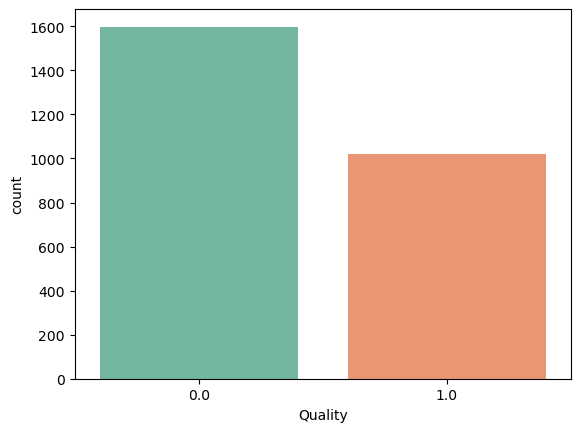

In [22]:
# Plot the distribution of the target label before resampling
sns.countplot(x=y_train, palette="Set2")
plt.show()

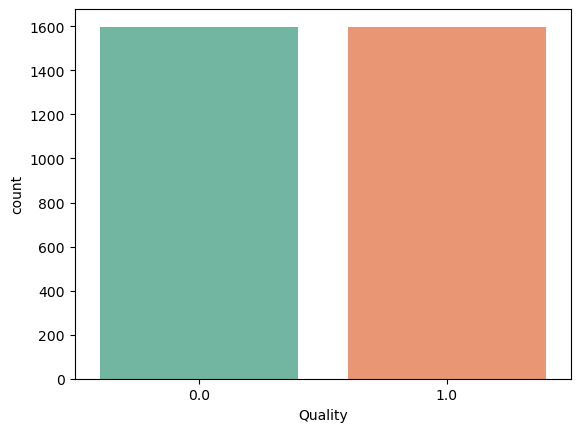

In [23]:
# SMOTE Oversampling
smote = SMOTE(random_state=42)

# Fit SMOTE to training data
X_resampled, y_resampled = smote.fit_resample(X_training, y_train)

# Plot the distribution of the target label after resampling
sns.countplot(x=y_resampled, palette="Set2")
plt.show()

<hr></hr>
<h3>Model Selection</h3>
<hr></hr>

Evaluating Model Performance

We will employ three metrics to assess the effectiveness of our model:

<b>Accuracy</b>: It measures the proportion of correct predictions made by the model.

<b>F1-Score</b>: The F1-score, a harmonic mean of recall and precision, disregards true negatives, focusing instead on the balance between identifying true positives and avoiding false positives.


<b>ROC_AUC</b>: ROC_AUC, also known as the Area Under the Receiver Operating Characteristic Curve, provides a comprehensive evaluation of the model's ability to distinguish between classes across a range of probability thresholds.

In our Case the best scoring method is F1 Score as it takes into account the relative importance of the false positive and false negative resutls.

In [24]:
scoring_metrics = ["accuracy","f1", "roc_auc"]

<h4>Pipeline</h4>
<li>I have used pipeline here as it allows organizing data, training models, and deploying them to make predictions easier.</li>
<li>Pipeline also helps prevent data leakage. data not intended for training could leak out and be used to train the model.</li>

ref: https://medium.com/@muhammad_nanda/building-a-machine-learning-pipeline-with-data-leakage-handling-153da020a366#:~:text=Building%20a%20pipeline%20that%20addresses,leaks%20into%20the%20training%20process.

In [25]:
# Amount overdue 1 month ago
def Drinkable(df):
    df['drinkable'] = (df['ph'] >= 6.5) & (df['ph'] <= 8.5)
    return df


# Preprocessing steps
numeric_transformer = Pipeline([("scaler", RobustScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, num_cols),
    ]
)

# Oversampling
smt = SMOTE(random_state=42)

# Pipeline steps
steps = [
    ("drinkable", FunctionTransformer(Drinkable)),
    ("preprocessing", preprocessor),
    ("over", smt),
    ("model"),
]


STEP_LEN = len(steps) - 1

<h4>Model Evaluation</h4>
I will be using models from sklearns classification models to see the best model. (Without any hyper parameter Tunning)

We will be using the previously defined scoring metrics to evaluate the models.

ref: https://scikit-learn.org/stable/supervised_learning.html

In [26]:
# Function to plot learning curves for a model

def plot_learning_curve(
    model,
    X,
    y,
    scoring,
    cv=StratifiedKFold(shuffle=True, random_state=42),
    train_sizes=np.linspace(0.1, 1.0, 10),
    ax=None,
):
    
    # Get model name
    try:
        model_name = type(model[-1]).__name__
    except:
        model_name = type(model).__name__
        
    # Create plot if ax is not passed
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
        
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        model,
        X,
        y,
        cv=cv,
        n_jobs=-1,
        train_sizes=train_sizes,
        return_times=True,
        scoring=scoring,
    )
    
    # Calculate mean of scores
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # Plot learning curve
    ax.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    ax.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    
    # Formatting
    ax.legend(loc="best")
    ax.set(
        ylim=(
            min(np.nanmin(train_scores), np.nanmin(test_scores)) - 0.01,
            max(np.nanmax(train_scores), np.nanmax(test_scores)) + 0.01,
        )
    )

    # Setting labels
    ax.set_title(f"Learning Curve of {model_name}")
    ax.set_ylabel(f"{scoring}")
    ax.set_xlabel("Train Sizes")
    return ax

In [27]:
# Initiate Classifiers with default parameters
models = [
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("RandomForestClassifier", RandomForestClassifier()),
    ("AdaBoostClassifier", AdaBoostClassifier()),
    ("LogisticRegression", LogisticRegression()),
    ("KNeighborsClassifier", KNeighborsClassifier()),
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("Perceptron", Perceptron()),
    ("ExtraTreesClassifier", ExtraTreesClassifier()),
    ("GaussianNB", GaussianNB()),
    ("RidgeClassifier", RidgeClassifier()),
    ("RidgeClassifierCV", RidgeClassifierCV()),
    ("SGDClassifier", SGDClassifier()),
]

In [28]:
# Function to access the performance of the models

def select_model(X_train, y_train, models, scoring):
    
    # Placeholder for the results
    out = []
    
    # Iterate through models
    for name, model in models:
        
        # Create a pipeline with the model and preprocessing steps
        steps[STEP_LEN] = (name, model)
        temp_pipeline = Pipeline(steps=steps)
        plot_learning_curve(
            temp_pipeline,
            X_train,
            y_train,
            scoring="f1",
            ax=ax[models.index((name, model)) % 4, models.index((name, model)) // 4],
        )
        
        # Cross validate the model
        score = cross_validate(
            temp_pipeline,
            X_train,
            y_train,
            scoring=scoring,
            n_jobs=3,
            cv=5,
            return_train_score=True,
        )
        
        # Calculate the average score across all the folds
        out.append(pd.Series(score, name=name).apply(np.mean))

    return pd.DataFrame(out)

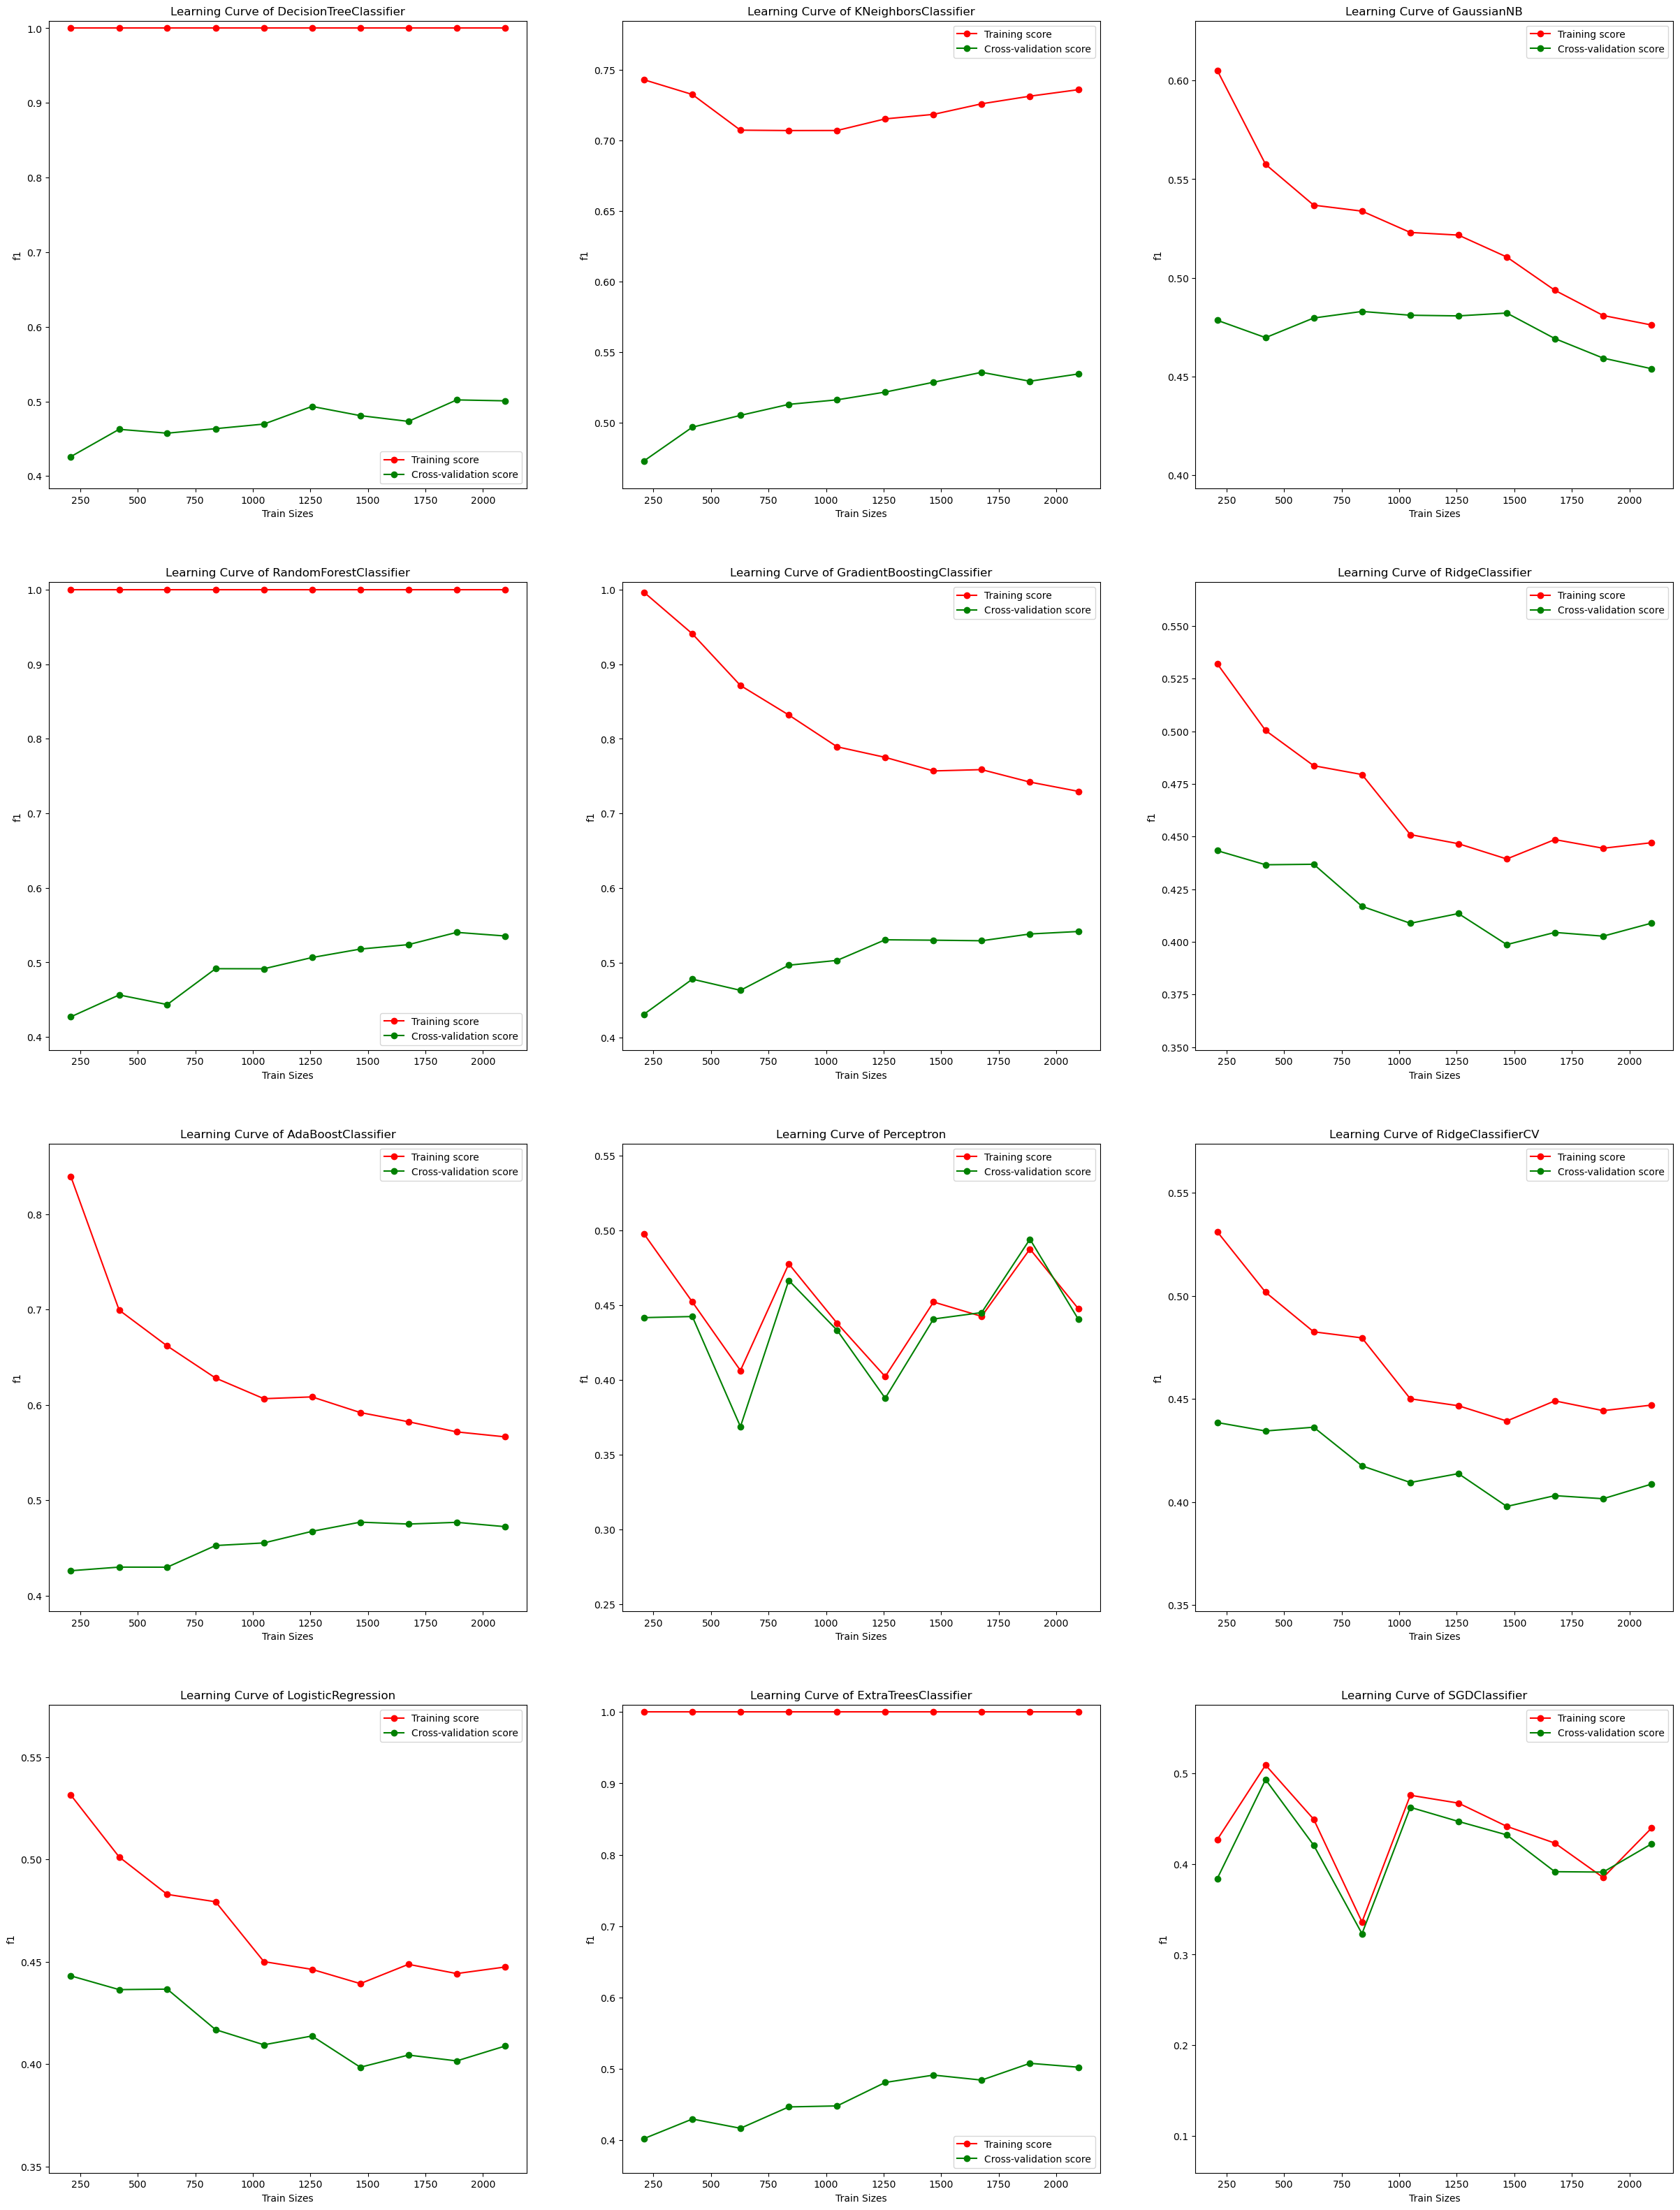

In [29]:
# Comparing the 12 learning curves
fig, ax = plt.subplots(4, 3, figsize=(30, 40))

model_scores = select_model(X_train, y_train, models, scoring_metrics)

In [30]:
# Accessing the scorings
model_scores.style.apply(
    lambda x: ["background-color: red; color: white" if v else "" for v in x == x.min()]
).apply(
    lambda x: [
        "background-color: green; color: white" if v else "" for v in x == x.max()
    ]
)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_roc_auc,train_roc_auc
DecisionTreeClassifier,0.072040,0.005309,0.583206,1.000000,0.484644,1.000000,0.568738,1.000000
RandomForestClassifier,1.901160,0.062653,0.655344,1.000000,0.533804,1.000000,0.679045,1.000000
AdaBoostClassifier,0.531718,0.043205,0.538168,0.631107,0.456762,0.566541,0.550056,0.688426
LogisticRegression,0.036148,0.015349,0.495802,0.519752,0.424921,0.450909,0.492646,0.523289
KNeighborsClassifier,0.020563,0.073654,0.604198,0.774237,0.526695,0.737280,0.640379,0.867083
GradientBoostingClassifier,2.158847,0.022609,0.598473,0.768702,0.512341,0.717517,0.632697,0.860053
Perceptron,0.036108,0.022977,0.498092,0.482920,0.475066,0.470057,0.503503,0.502460
ExtraTreesClassifier,0.806581,0.085046,0.657252,1.000000,0.492525,1.000000,0.677149,1.000000
GaussianNB,0.043392,0.017917,0.574046,0.586069,0.466204,0.479091,0.585618,0.605297
RidgeClassifier,0.077020,0.013402,0.495420,0.519752,0.424207,0.450910,0.492689,0.523293


From above we can see that theres no extremly good model where most of the model suffer from overfitting and underfitting.

Because of that i will be choosing a model that fits the best parameters, being F1 score and shows lesser signs of both overfitting and underfitting. 

<h4>Tuning the hyper parameters Random Forest Classifier</h4>

We can make improvements to the model by tuning the hyperparameters. We will be using GridSearchCV to find the best hyperparameters for our model.

In [31]:
# List of hyper parameters for Gradient Boosting Classifier
list(RandomForestClassifier().get_params().keys())

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

It is very hard to adjust all the hyper parameters for this model so we will be focusing on these important ones.

Random Forest Hyperparameters we’ll be Looking at:
<li>max_depth</li>
<li>min_sample_split</li>
<li>max_leaf_nodes</li>
<li>min_samples_leaf</li>
<li>n_estimators</li>
<li>max_sample (bootstrap sample)</li>
<li>max_features</li>

In [32]:
# Create param grid
param_grid = {
# Number of trees in random forest
'n_estimators': [100, 200, 300, 400, 500],
# Number of features to consider at every split
'max_features':['auto', 'sqrt','log2'],
# Maximum number of levels in tree
'max_depth': [3, 4, 5, 6, 7],
# Minimum number of samples required to split a node
'min_samples_split':[2, 5, 10,14],
# Minimum number of samples required at each leaf node
'min_samples_leaf': [1, 2, 4,6,8],
}

# Create model based on pipeline
steps[STEP_LEN] = (
    "hyper",
    GridSearchCV(
        RandomForestClassifier(),
        param_grid,
        cv=5,
        verbose=1,
        n_jobs=-1,
        scoring="f1",
    ),
)

# Fitting Grid Search to Pipeline
rf_search = Pipeline(steps=steps)
rf_search.fit(X_train, y_train)

# Best model
print(rf_search["hyper"].best_estimator_)
print(rf_search["hyper"].best_params_)
print(rf_search["hyper"].best_score_)

# Fitting the best model to the pipeline
steps[STEP_LEN] = ("model", rf_search["hyper"].best_estimator_)
rf_clf = Pipeline(steps=steps)
rf_clf.fit(X_train, y_train)

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


c:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2500 fits failed out of a total of 7500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
656 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\user\anaconda3\Lib\site-packages\

RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=300)
{'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
0.6595237179800068


Pipeline(steps=[('drinkable',
                 FunctionTransformer(func=<function Drinkable at 0x0000023898303240>)),
                ('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['ph', 'Hardness', 'Solids',
                                                   'Chloramines', 'Sulfate',
                                                   'Conductivity',
                                                   'Organic_carbon',
                                                   'Trihalomethanes',
                                                   'Clarity'])])),
                ('over', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(max_depth=7, max_features='log2',
                                        n_estimators=300))])

In [46]:
# Predicting the Test set results
rf_y_pred = rf_clf.predict(X_test)

In [34]:
steps[STEP_LEN] = ("model", DummyClassifier(strategy="uniform"))

# Create the pipeline
dummy = Pipeline(steps=steps)
dummy.fit(X_train, y_train)

# Predicting the Test set results
dummy_y_pred = dummy.predict(X_test)

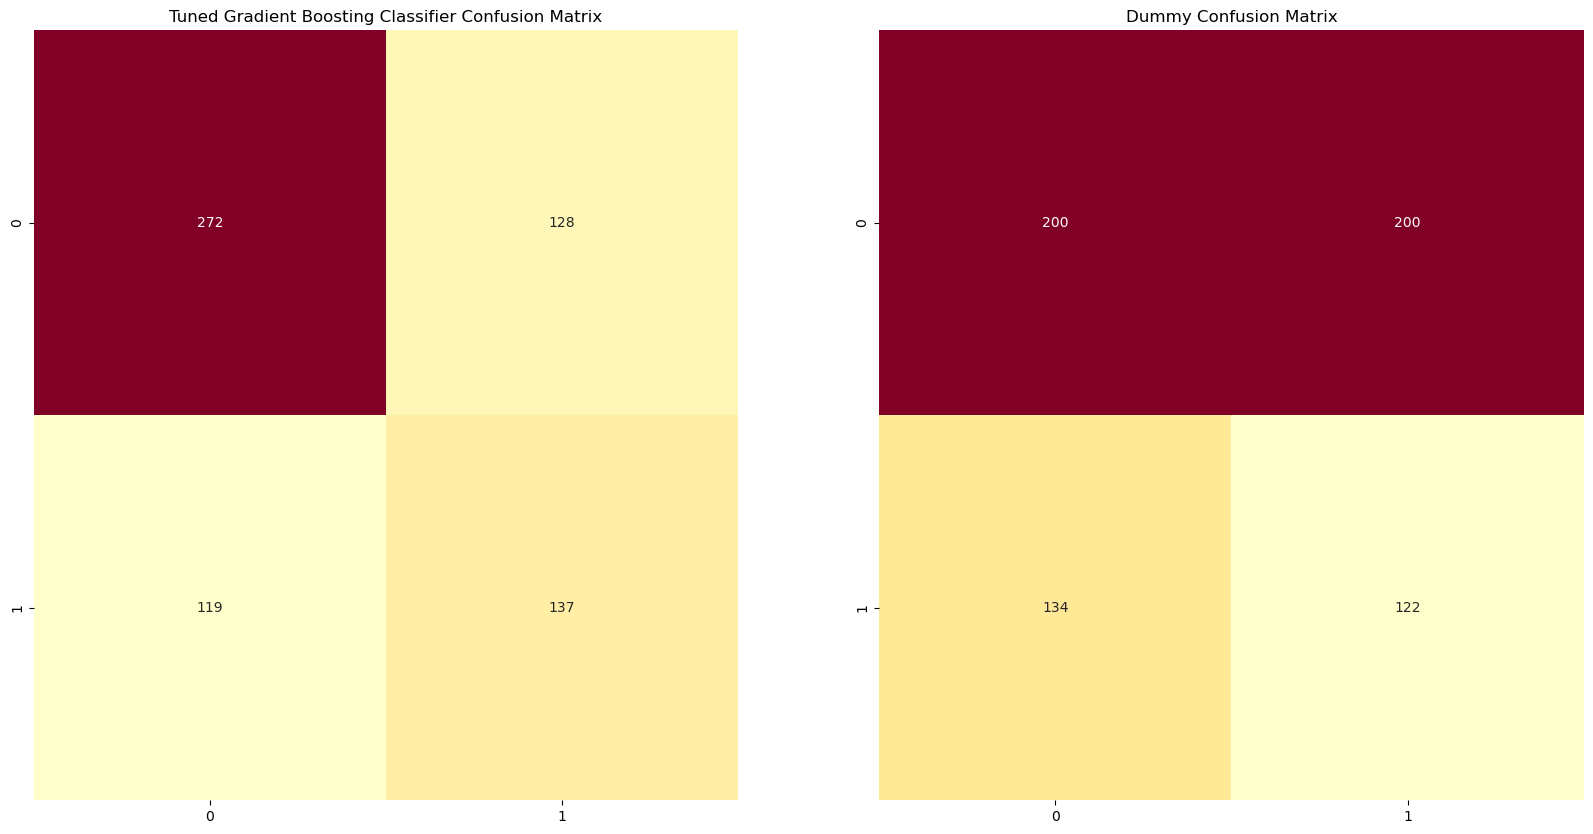

<Figure size 1000x1000 with 0 Axes>

In [35]:
# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
dummy_cm = confusion_matrix(y_test, dummy_y_pred)

# Generate heatmaps of the confusion matrices
plt.figure(figsize=(10, 10))
sns.heatmap(rf_cm, annot=True, fmt="", cbar=False, cmap="YlOrRd", ax=ax1)
sns.heatmap(dummy_cm, annot=True, fmt="", cbar=False, cmap="YlOrRd", ax=ax2)

# Set titles
ax1.set_title("Tuned Gradient Boosting Classifier Confusion Matrix")
ax2.set_title("Dummy Confusion Matrix")
plt.show()

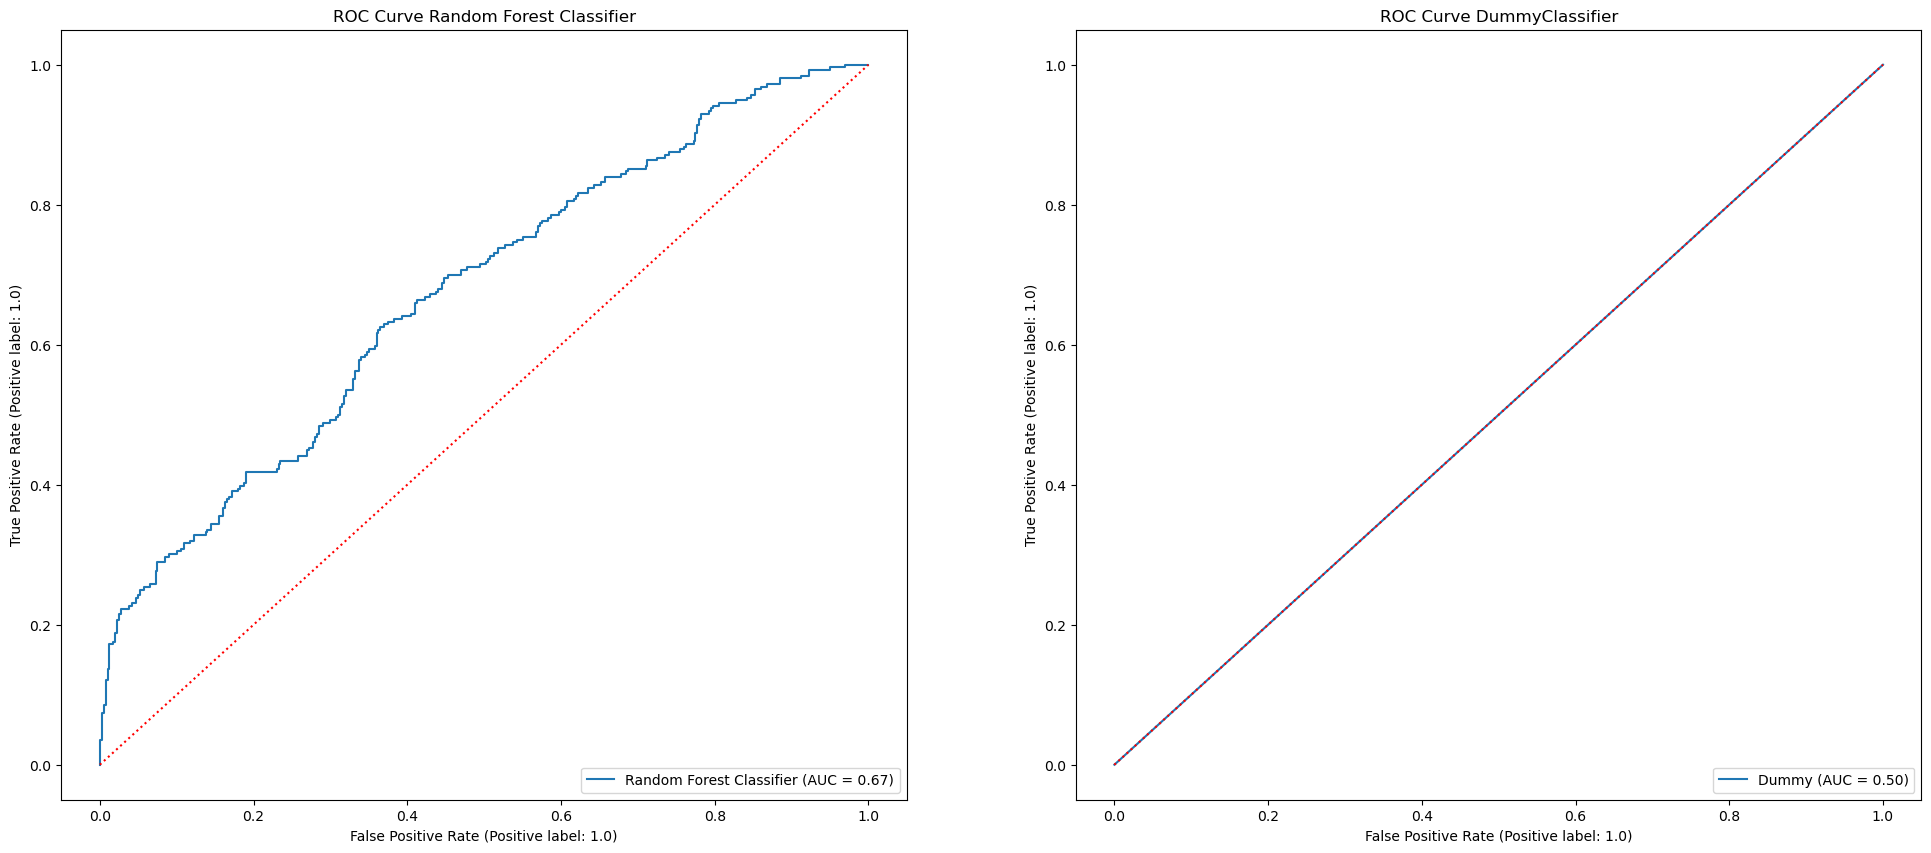

In [36]:
# Create figure
fig, ax = plt.subplots(1, 2, figsize=(24, 10))

# Gradient Boosting Classifier
RocCurveDisplay.from_estimator(rf_search, X_test, y_test, ax=ax[0], name="Random Forest Classifier")

# Dummy Classifier
RocCurveDisplay.from_estimator(dummy, X_test, y_test, ax=ax[1], name="Dummy")

# 50% line
x = np.linspace(0, 1, 2)
ax[0].plot(x, x, ":", color="red")
ax[1].plot(x, x, ":", color="red")

# Set titles
ax[0].set_title("ROC Curve Random Forest Classifier")
ax[1].set_title("ROC Curve DummyClassifier")
plt.show()

In [37]:
# Classification Report
print(
    f"""
Random Forest Classifier:
{classification_report(y_test, rf_y_pred, digits=3)}

Dummy Classifier:
{classification_report(y_test, dummy_y_pred, digits=3)}
"""
)


Random Forest Classifier:
              precision    recall  f1-score   support

         0.0      0.696     0.680     0.688       400
         1.0      0.517     0.535     0.526       256

    accuracy                          0.623       656
   macro avg      0.606     0.608     0.607       656
weighted avg      0.626     0.623     0.625       656


Dummy Classifier:
              precision    recall  f1-score   support

         0.0      0.599     0.500     0.545       400
         1.0      0.379     0.477     0.422       256

    accuracy                          0.491       656
   macro avg      0.489     0.488     0.484       656
weighted avg      0.513     0.491     0.497       656




<hr></hr>
<h3>Feature Engineering</h3>
<hr></hr>

This shows that almost half of the dataset is not drinkable and the other is coming from WHO. As this is a big reason we can feature engineer a new feature called drinkable where its a binary value 1 and 0, 1 being drinkable and 0 being not drinkable.

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [40]:
print(f"Max value in PH: {max(df['ph'])}")
print(f"Max value in PH: {min(df['ph'])}")
print(f"Count of PH: {len(df['ph'])}")
Drinkable = 0

for i in df['ph']:
    if(i >= 6.5):
        if(i <= 8.5):
            Drinkable+=1

print(f"Number of times pH is inside Drinkable range: {Drinkable}")

Max value in PH: 14.0
Max value in PH: 0.0
Count of PH: 3276
Number of times pH is inside Drinkable range: 1688


In [41]:
df['drinkable'] = (df['ph'] >= 6.5) & (df['ph'] <= 8.5)

df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,Quality,drinkable
0,7.156857,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0,True
1,3.716080,129.422921,18630.05786,6.635246,336.094350,592.885359,15.180013,56.329076,4.500656,0.0,False
2,8.099124,224.236259,19909.54173,9.275884,330.449166,418.606213,16.868637,66.420093,3.055934,0.0,True
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0.0,True
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0,False
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0.0,False
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0.0,False
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0.0,False
8,7.592418,118.988579,14285.58385,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0.0,True
9,11.180284,227.231469,25484.50849,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0.0,False


In [42]:
X, y = df.drop(["Quality"], axis=1), df["Quality"]

X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,drinkable
0,7.156857,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,True
1,3.716080,129.422921,18630.05786,6.635246,336.094350,592.885359,15.180013,56.329076,4.500656,False
2,8.099124,224.236259,19909.54173,9.275884,330.449166,418.606213,16.868637,66.420093,3.055934,True
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,True
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,False


<h4>Splitting Data points</h4>

To evaluate our final chosen models, we will leave a small independent test set to report on the final performance of our classifiers. When building the hold out set, we use stratify to ensure that the distribution of classes is the same in both the independent set and the training set.

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=50
)

<h4>Standard Scalling</h4>
standardizing the training and test sets separately helps maintain the integrity of the model evaluation process and ensures that the model generalizes well to unseen data.This also ensures that data leakage is lowered and almost nullified.

In [44]:
#Standardize the data set from X_train.
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

NameError: name 'StandardScaler' is not defined

<h4>Resampling</h4>
Our target value distribution is imbalanced, so we will have to resample our data to balance the distribution. To do this, we will use SMOTE to oversample the minority class.

In [ ]:
# Plot the distribution of the target label before resampling
sns.countplot(x=y_train, palette="Set2")
plt.show()

In [ ]:
# SMOTE Oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE to training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Plot the distribution of the target label after resampling
sns.countplot(x=y_resampled, palette="Set2")
plt.show()

<h3>Choosing Models</h3>

In [ ]:
lr = LogisticRegression()

knn = KNeighborsClassifier()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

ada = AdaBoostClassifier()

bc = BaggingClassifier()

svc = SVC(kernel='linear')

mlp =MLPClassifier()

dummy = DummyClassifier(strategy="uniform")

In [ ]:
Models = [('Logistic Regression', lr), ('K Nearest Neighbours', knn),
              ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
                ('MLP Classifier', mlp),
            ("GradientBoostingClassifier", GradientBoostingClassifier()),
          ("ExtraTreesClassifier", ExtraTreesClassifier()),
            ("GaussianNB", GaussianNB()), ("Dummy", DummyClassifier(strategy="uniform"))]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Create an empty list to store dictionaries for each model
model_results = []

for Model_Name, Model in Models:
    # Fit the classifier to the training set
    Model.fit(X_train, y_train)

    # Predict y_preds on the test set
    y_pred = Model.predict(X_test)

    # Evaluate classifier's accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate F1 scores for both classes
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score_0 = report['0.0']['f1-score']
    f1_score_1 = report['1.0']['f1-score']

    # Store information in a dictionary
    model_result = {
        'Model_Name': Model_Name,
        'Accuracy': accuracy,
        'F1_Score_0': f1_score_0,
        'F1_Score_1': f1_score_1
    }

    # Append the dictionary to the list
    model_results.append(model_result)

# Convert the list of dictionaries to a DataFrame
df_model_results = pd.DataFrame(model_results)

# Sort the DataFrame based on F1 score for class 0 in ascending order
df_model_results = df_model_results.sort_values(by='F1_Score_1', ascending=False)

# Print the sorted DataFrame
df_model_results.head(10)

In [ ]:
para_knn = {'n_neighbors':np.arange(1, 50)}  #parameters of knn
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) #search knn for 5 fold cross validation

#parameters for decision tree
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv
#"gini" for the Gini impurity and “entropy” for the information gain.
#min_samples_leaf: The minimum number of samples required to be at a leaf node, have the effect of smoothing the model

#parameters for random forest
#n_estimators: The number of trees in the forest.
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)


params_mlp = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam']}
grid_mlp=GridSearchCV(mlp, param_grid=params_mlp, cv=5)

In [ ]:
grid_knn.fit(X_train, y_train)
print("Best parameters for KNN:", grid_knn.best_params_)

grid_dt.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_dt.best_params_)

grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)

grid_mlp.fit(X_train, y_train)
print("Best parameters for MLP:", grid_mlp.best_params_)

In [ ]:
from sklearn.neural_network import MLPClassifier

knn = KNeighborsClassifier(n_neighbors=39)
dt = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=40, random_state=42) #42
rf = RandomForestClassifier(min_samples_leaf=2,n_estimators=350, random_state=42) #500
mlp = MLPClassifier(activation='tanh',solver='adam',random_state=42)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import learning_curve

classifiers = [('Decision Tree', dt), ('MLP Classifier', mlp), ('Decesion Tree', dt), ("Random Forest", rf)]

train_sizes = np.linspace(.1, 1.0, 5)

for classifier_name, classifier in classifiers:
    # Fit the classifier to the training set
    classifier.fit(X_train, y_train)

    # Predict y_preds on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate classifier's accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)

    print(classifier_name, "Scores:")
    # Additionally, you can print the classification report
    print(classification_report(y_test, y_pred))

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Print ROC and AUC values
    print('AUC for {:s}: {:.2f}'.format(classifier_name, roc_auc))

    # Print classifier's name and accuracy
    print('{:s} : {:.2f}'.format(classifier_name, accuracy))

    print("*" * 100)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - {:s}'.format(classifier_name))
    plt.legend(loc="lower right")
    plt.show()

    # Plot learning curve
    plt.figure()
    train_sizes, train_scores, val_scores = learning_curve(classifier, X, y, cv=5, train_sizes=train_sizes)
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training Score')
    plt.plot(train_sizes, val_scores.mean(axis=1), 'x-', label='Validation Score')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.title(classifier_name)
    plt.grid(True)
    plt.legend()
    plt.show()


In [ ]:
# Fit the classifier to the training set
mlp.fit(X_train, y_train)

# Predict y_preds on the test set
y_pred = mlp.predict(X_test)

# Evaluate classifier's accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

# Additionally, you can print the classification report
print(classification_report(y_test, y_pred))

Model_Predict = mlp.predict(X_test)
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Print ROC and AUC values
print('AUC for {:s}: {:.2f}'.format("MLP", roc_auc))

# Print classifier's name and accuracy
print('{:s} : {:.2f}'.format("MLP", accuracy))

In [ ]:
# Fit the classifier to the training set
dummy.fit(X_train, y_train)

# Predict y_preds on the test set
y_pred = dummy.predict(X_test)

# Evaluate classifier's accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

# Additionally, you can print the classification report
print(classification_report(y_test, y_pred))

dummy_Predict = dummy.predict(X_test)
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, dummy.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Print ROC and AUC values
print('AUC for {:s}: {:.2f}'.format("Dummy", roc_auc))

# Print classifier's name and accuracy
print('{:s} : {:.2f}'.format("Dummy", accuracy))

In [ ]:
# Create figure
fig, ax = plt.subplots(1, 2, figsize=(24, 10))

# Gradient Boosting Classifier
RocCurveDisplay.from_estimator(mlp, X_test, y_test, ax=ax[0], name="MLP Classifier")

# Dummy Classifier
RocCurveDisplay.from_estimator(dummy, X_test, y_test, ax=ax[1], name="Dummy")

# 50% line
x = np.linspace(0, 1, 2)
ax[0].plot(x, x, ":", color="red")
ax[1].plot(x, x, ":", color="red")

# Set titles
ax[0].set_title("ROC Curve MLP Classifier")
ax[1].set_title("ROC Curve DummyClassifier")
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier
final_model_hard = VotingClassifier(
        estimators= [('K Nearest Neighbours', knn),
              ('Decision Tree', dt), ('Random Forest', rf),
              ('MLP Classifier', mlp)],voting='soft')

#hard
final_model_hard.fit(X_train, y_train)

pred_final_hard = final_model_hard.predict(X_test)

print('Voting Model (hard): ', accuracy_score(y_test, pred_final_hard))
print(classification_report(y_test, pred_final_hard))

In [ ]:
# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Confusion Matrix
gb_cm = confusion_matrix(y_test, Model_Predict)
dummy_cm = confusion_matrix(y_test, dummy_Predict)

# Generate heatmaps of the confusion matrices
plt.figure(figsize=(10, 10))
sns.heatmap(gb_cm, annot=True, fmt="", cbar=False, cmap="YlOrRd", ax=ax1)
sns.heatmap(dummy_cm, annot=True, fmt="", cbar=False, cmap="YlOrRd", ax=ax2)

# Set titles
ax1.set_title("Tuned Multilayer perceptron Confusion Matrix")
ax2.set_title("Dummy Confusion Matrix")
plt.show()

In [ ]:
# Classification Report
print(
    f"""
Gradient Boosting Classifier:
{classification_report(y_test, Model_Predict, digits=3)}

Dummy Classifier:
{classification_report(y_test, dummy_Predict, digits=3)}
""")

<img src="image.png">